## Chapter 11
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Figure 11.4

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(-2, 2)

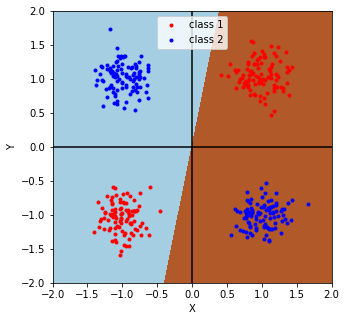

In [2]:
plt.figure(figsize=(5,5))

np.random.seed(3)
n = 100
msize = 3

x =  np.append(np.random.normal(1,0.2,size=n),np.random.normal(-1,0.2,size=n))
y = np.append(np.random.normal(1,0.2,size=n),np.random.normal(-1,0.2,size=n))
x2 =  np.append(np.random.normal(-1,0.2,size=n),np.random.normal(1,0.2,size=n))
y2 = np.append(np.random.normal(1,0.2,size=n),np.random.normal(-1,0.2,size=n))

plt.plot(x,y,'ro', markersize=msize, label="class 1")
plt.plot(x2,y2,'bo', markersize=msize, label="class 2")
plt.plot([0,0], [-10,10], 'k-', [-10,10], [0,0], 'k-')

X = np.append(x, x2)
Y = np.append(y, y2)
Z = np.array([[i,j] for i,j in zip(X,Y)])

######Make a train data to fit
class1 = [0]*len(x)
class2 = [1]*len(x2)
train = np.append(class1, class2)

reg = LogisticRegression()
reg.fit(Z, train)
label = reg.predict(Z)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
h = .001  # step size in the mesh
x_min, x_max = Z[:, 0].min() - .6, Z[:, 0].max() + .6
y_min, y_max = Z[:, 1].min() - .6, Z[:, 1].max() + .6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
predict = reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
predict = predict.reshape(xx.shape)
plt.pcolormesh(xx, yy, predict, cmap=plt.cm.Paired)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper center")
plt.xlim(-2,2)
plt.ylim(-2,2)

### Figure 11.8
#### Used reference: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

(-5.5, 5.5, -5.58273955267483, 5.8402819060630655)

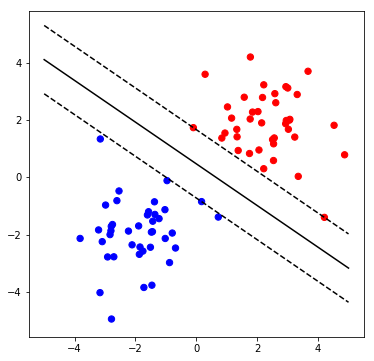

In [3]:
plt.figure(figsize=(6,6))

np.random.seed(17)
n = 40
X = np.r_[np.random.randn(n,2) - [2,2], np.random.randn(n,2) + [2,2]]
Y = [0]*n + [1]*n

#fit the model
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)

#get the separating hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5,5)
yy = a*xx - (svc.intercept_[0]) / w[1]

#plot the parallel lines to the separating hyper plane that pass
#through the support vectors
b = svc.support_vectors_[0]
yy_down = a*xx + (b[1]-a*b[0])
b = svc.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])

#hyperplane separating line
plt.plot(xx, yy, 'k-')
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up,'k--')
#points
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.get_cmap("bwr"), s=40)
plt.axis('tight')

### Figure 11.9 - SVM vs. LR
#### Used reference: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

[[1.18937679 0.67388417]]
[[7.37749085 6.09364612]]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


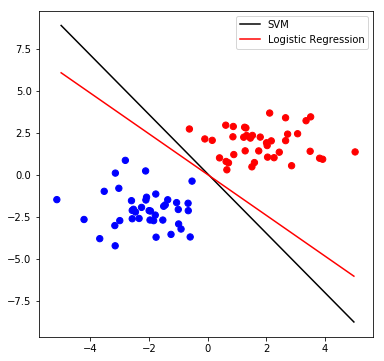

In [5]:
plt.figure(figsize=(6,6))
np.random.seed(12)
n = 40
X = np.r_[np.random.randn(n,2) - [2,2], np.random.randn(n,2) + [2,2]]
Y = [0]*n + [1]*n

#fit the model
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)

#get the separating hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5,5)
yy = a*xx - (svc.intercept_[0]) / w[1]

#hyperplane separating line
plt.plot(xx, yy, 'k-',label='SVM')

#------------------------------------------
#fit the model
lg = LogisticRegression(C=1e5)
lg.fit(X,Y)

#get the separating line
w = lg.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5,5)
yy = a*xx - (lg.intercept_[0]) / w[1]
print(svc.coef_)
print(lg.coef_) 

#hyperplane separating line
plt.plot(xx, yy, 'r-', label='Logistic Regression')

#points
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.get_cmap("bwr"), s=40)
plt.legend()

### Figure 11.10 Left - Points in 2D

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


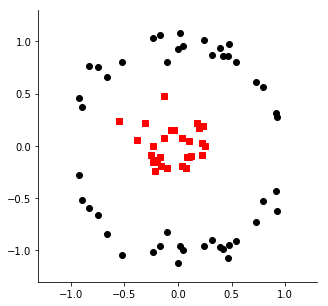

In [6]:
plt.figure(figsize=(5,5))

#Points surrounding
n = 30
np.random.seed(13)
x = np.random.normal(0, 0.8,n) + np.random.normal(0,0.1,n)
y = np.sqrt(1-x*x)  + np.random.normal(0,0.1,n)
y2 = -np.sqrt(1-x*x)  + np.random.normal(0,0.1,n)
x = np.append(x,x)
y = np.append(y,y2)
plt.plot(x,y,'ko')

#Points inside
xi = np.random.normal(0,0.25, n)
yi = np.random.normal(0,0.2, n)
plt.plot(xi,yi, 'rs')

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

### Figure 11.10 Right - Points in 3D

(-1.3, 1.3)

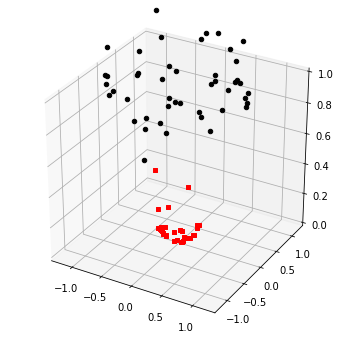

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y, x*x + y*y, s=20, c='k', marker='o', depthshade=False)
ax.scatter(xi, yi, xi*xi + yi*yi, s=20, c='r', marker='s', depthshade=False)

ax.set_zlim(0, 1)
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)

### Figure 11.14 Left - Logistic function

(-0.1, 1.1)

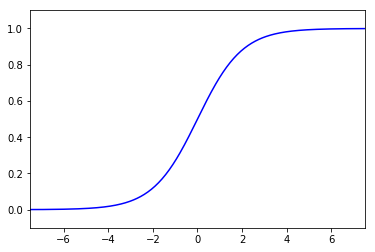

In [8]:
x = np.linspace(-10,10,500)
y = 1/(1+np.exp(-x))
plt.plot(x,y, 'b-', linewidth=1.5)
plt.xlim(-7.5,7.5)
plt.ylim(-0.1,1.1)


### Figure 11.14 Right 

(-0.5, 3)

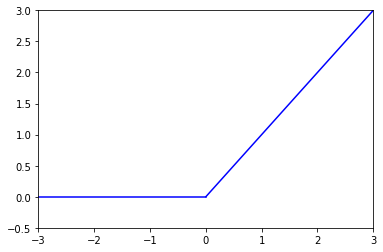

In [9]:
x = np.linspace(0,10,100)
y = x

x1 = np.linspace(-10,0,100)
y1 = 0*x

plt.plot(x, y, 'b-', linewidth=1.5)
plt.plot(x1, y1, 'b-', linewidth=1.5)
plt.xlim(-3,3)
plt.ylim(-0.5, 3)        